Simpson's 1/3 rule result = 2.00000042
Exact integral value      = 2.00000000
Absolute error            = 4.23e-07


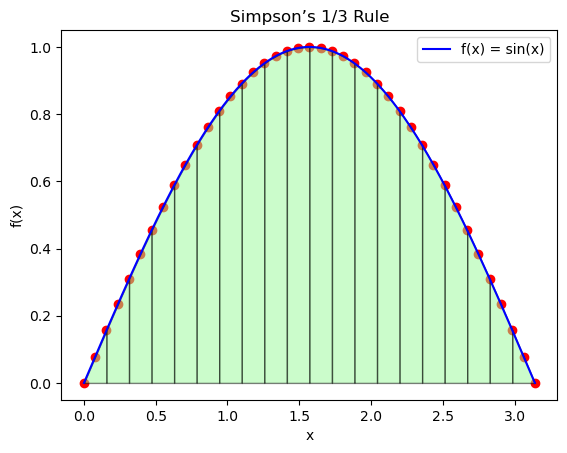

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def simpson_one_third(f, a, b, n):

    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's 1/3 rule.")

    h = (b - a) / n
    x = [a + i*h for i in range(n + 1)]
    y = [f(xi) for xi in x]

    # f(x0) + f(xn)
    total = y[0] + y[-1]     
    
    # Add 4*f(x1), 4*f(x3), ... (odd indices)
    for i in range(1, n, 2):
        total += 4 * y[i]
    
    # Add 2*f(x2), 2*f(x4), ... (even indices)
    for i in range(2, n-1, 2):
        total += 2 * y[i]
    
    I = (h / 3) * total
    return I



f = lambda x: np.sin(x)
#f = lambda x: np.exp(-x**2) * np.cos(5*x)
a, b = 0, np.pi
n = 40 # Must be even

simpson_result = simpson_one_third(f, a, b, n)
exact_result = quad(f, a, b)[0]

print(f"Simpson's 1/3 rule result = {simpson_result:.8f}")
print(f"Exact integral value      = {exact_result:.8f}")
print(f"Absolute error            = {abs(exact_result - simpson_result):.2e}")

# ------------------------------------------------------------
# Visualization
# ------------------------------------------------------------
x_plot = np.linspace(a, b, 300)
y_plot = f(x_plot)
x_nodes = [a + i*(b - a)/n for i in range(n + 1)]
y_nodes = [f(xi) for xi in x_nodes]

plt.plot(x_plot, y_plot, 'b', label='f(x) = sin(x)')
plt.scatter(x_nodes, y_nodes, color='r')

for i in range(0, n, 2):
    xs = np.linspace(x_nodes[i], x_nodes[i+2], 30)
    coeffs = np.polyfit(x_nodes[i:i+3], y_nodes[i:i+3], 2)
    ys = np.polyval(coeffs, xs)
    plt.fill_between(xs, ys, color='palegreen', alpha=0.5, edgecolor='k')

plt.title("Simpson’s 1/3 Rule")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
#plt.grid(True)
plt.show()


Simpson's 1/3 rule result = 2.00000042
Exact integral value      = 2.00000000
Absolute error            = 4.23e-07


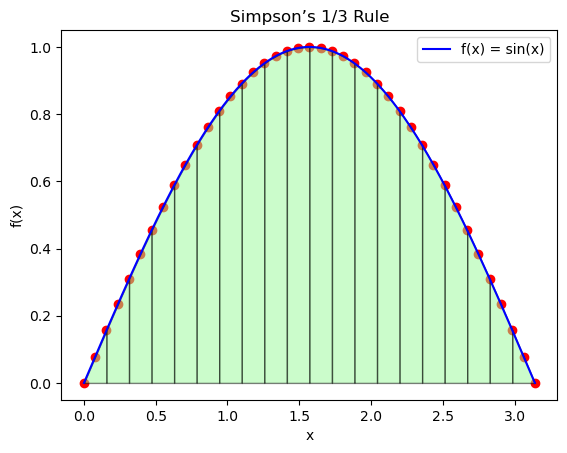

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def simpson_one_third(f, a, b, n):

    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's 1/3 rule.")

    h = (b - a) / n
    
    total = f(a) + f(b)
    for i in range(1,n):
        x = a + i*h
        if i % 2 == 0:                        # if i is even
            total += 2 * f(x)                # multiply f(x) by 2
        else:
            total += 4 * f(x)                # if i is odd, multiply f(x) by 4
    return (h/3) * total



f = lambda x: np.sin(x)
#f = lambda x: np.exp(-x**2) * np.cos(5*x)
a, b = 0, np.pi
n = 40 # Must be even

simpson_result = simpson_one_third(f, a, b, n)
exact_result = quad(f, a, b)[0]

print(f"Simpson's 1/3 rule result = {simpson_result:.8f}")
print(f"Exact integral value      = {exact_result:.8f}")
print(f"Absolute error            = {abs(exact_result - simpson_result):.2e}")

# ------------------------------------------------------------
# Visualization
# ------------------------------------------------------------
x_plot = np.linspace(a, b, 300)
y_plot = f(x_plot)
x_nodes = [a + i*(b - a)/n for i in range(n + 1)]
y_nodes = [f(xi) for xi in x_nodes]

plt.plot(x_plot, y_plot, 'b', label='f(x) = sin(x)')
plt.scatter(x_nodes, y_nodes, color='r')

for i in range(0, n, 2):
    xs = np.linspace(x_nodes[i], x_nodes[i+2], 30)
    coeffs = np.polyfit(x_nodes[i:i+3], y_nodes[i:i+3], 2)
    ys = np.polyval(coeffs, xs)
    plt.fill_between(xs, ys, color='palegreen', alpha=0.5, edgecolor='k')

plt.title("Simpson’s 1/3 Rule")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
#plt.grid(True)
plt.show()
